In [35]:
import numpy as np
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        #まず適当に与えられた重みから総入力を計算し、０より大きいかをどうかで１かー１を出力する。
        #その出力をもとに予測値を出し、一行目の各特徴量Xに対して重みを更新する
        #その更新量をupdateとし、updateが０じゃなかったらerror1を＋１
        #次の行にうつり、更新した重みから総入力を計算しｙを予測、再び重みを更新、updateが０じゃなかったら＋１
        #これをサンプルの数（len(y)）繰り返す
        #エラーの数をリストに追加し、今回得られた重みをもとに最初からやり直す
        for _ in range(self.n_iter):
            "dw = eta*(y - pred.y)*xi"
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0)
            #1周目のエラーの数、2周目の数、３...とerrors_に挿入していく。どんどんエラーの数が少なくなっていくはず
            self.errors_.append(errors)
        
        return self #この段階でselfは正しい重みを持っている
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

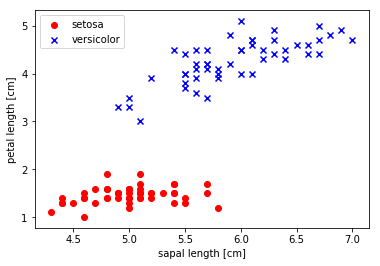

In [36]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)
df

import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100,4].values
y = np.where(y=="Iris-setosa", -1, 1)
X = df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="blue", marker="x",label="versicolor")

plt.xlabel("sapal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [37]:
a = 2
b = 0
b += int(a != 2)
b

0

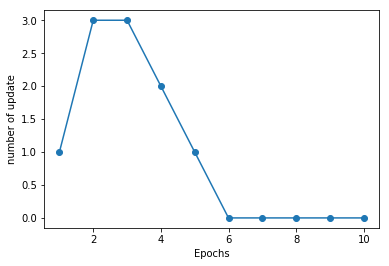

In [67]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker="o" )
plt.xlabel("Epochs")
plt.ylabel("number of update")
plt.show()

In [68]:
a = np.arange(1,11)
b = np.arange(11,21)
c = np.array([a.ravel(),b.ravel()])
d = np.array([a,b]).T

aa, bb = np.meshgrid(a,b)
print(aa)
print()
print(aa.ravel())
print()
print(bb.ravel())
print()
q = np.array([aa.ravel(), bb.ravel()])
print(q)
print()
q = np.array([aa.ravel(), bb.ravel()]).T
print(q)
print()
print(a)
print()
print(b)
print()
print(c)
print()
print(d)
print()
w = np.array([1,2,3,4,5])
print(w)
print(np.array([[0,1,2,3,4],[4,3,2,1,0]]))

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]

[ 1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1  2  3  4
  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8
  9 10  1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1  2
  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6
  7  8  9 10]

[11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15
 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20
 20 20 20 20]

[[ 1  2  3  4  5  6  7  8  9 10  1  2  3  4  5  6  7  

In [69]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    data_xx =  np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(data_xx)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0], X[y==cl,1], 
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor="black")

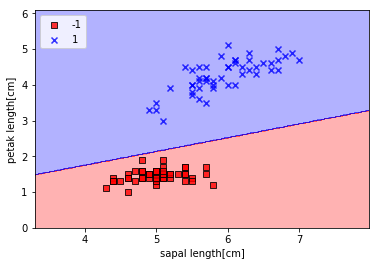

In [70]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("sapal length[cm]")
plt.ylabel("petak length[cm]")
plt.legend(loc="upper left")
plt.show()

In [11]:
print(d)
dd = d[:,0]
print(dd)

[[ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]
 [10 20]]
[ 1  2  3  4  5  6  7  8  9 10]


In [28]:
s = [1,1,1,1,1,1,1,1,1,1,0,0,0,0]
p = [2,2,2,2,2,2,2,2,2,2,3,3,3,3]
s = np.array(s)
p = np.array(p)
print(s)
ss = s[p==2]
print(ss)


[1 1 1 1 1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


In [7]:
q = 1
int(q!=1)

0